# The Sparks Foundation

Problem Statement: Predict the percentage of an student based on the no. of study hours.
* Author: Bhavik Jikadara

## Import Libraries

In [1]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from student_score.csv

dataset = pd.read_csv('student_score.csv') 

In [3]:
# head -> top five rows in datasets
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# The dimensionality of the DataFrame
dataset.shape

(25, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [8]:
# check the missing value in dataset
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Correlation between Hours and Score

In [9]:
dataset_corr = dataset.corr()
dataset_corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

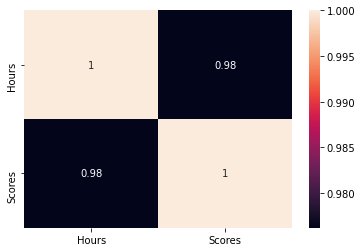

In [10]:
sns.heatmap(dataset_corr, annot = True)

## Training and Testing Dataset

In [11]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
print('X train: {}'.format(X_train.shape))
print('y train: {}'.format(y_train.shape))
print('X test: {}'.format(X_test.shape))
print('y test: {}'.format(y_test.shape))

X train: (20, 1)
y train: (20,)
X test: (5, 1)
y test: (5,)


## Model Selection: Liner Regression

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model = model.fit(X_train, y_train)

## Model Evaluation

In [16]:
# print the intercept and correlation coefficient
print('Intercept: ', model.intercept_)
print('Coefficient: ',model.coef_)

Intercept:  2.8268923538997086
Coefficient:  [9.68207815]


In [17]:
# Best fit line

line = model.intercept_ + model.coef_ * X_train

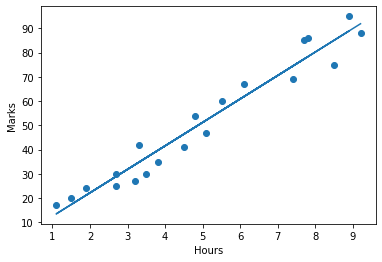

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, line)
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.show()

## Predictions from our Model

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

#### Actual value and Predict value compare

In [21]:
Predicted = pd.DataFrame({
    'Acual': y_test,
    'Predict': y_pred
})
Predicted

,Acual,Predict
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [22]:
# mse and rmse
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [23]:
print('MSE: ', mse)
print('RMSE: ', rmse)

MSE:  18.94321172231527
RMSE:  4.352380006653287


In [24]:
r2_score(y_test, y_pred)

0.9678055545167994

## Predicting on the basic of the User input

In [27]:
hours = input("Enter the hours of studying: ")
predicted_score = model.predict([[hours]])
print('If the student for {} hours then he can score {} marks.'.format(hours, predicted_score))

If the student for 8 hours then he can score [80.28351759] marks.
